In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import math 
from sklearn.metrics import mean_squared_error

In [57]:
timestep = 100
days_predict = 60

In [58]:
x_train = np.load("./data/x_train.npy")
y_train = np.load("./data/y_train.npy")
x_test = np.load("./data/x_test.npy")
y_test = np.load("./data/y_test.npy")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1298, 100, 1)
(1298,)
(55, 100, 1)
(55,)


In [59]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(timestep,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_15 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_16 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=30,batch_size=32,verbose=1)

Epoch 1/30


2022-02-13 00:22:55.585932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 00:22:55.899235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 00:22:56.105402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 00:22:56.282639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 00:22:56.502106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 00:22:56.865476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 00:22:57.196871: I tensorflow/core/grappler/optimizers/cust

41/41 [==============================] - ETA: 0s - loss: 0.0188

2022-02-13 00:23:02.340348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 00:23:02.443358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 00:23:02.594416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 00:23:02.750567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


41/41 [==============================] - 9s 144ms/step - loss: 0.0188 - val_loss: 0.0055
Epoch 2/30
41/41 [==============================] - 3s 85ms/step - loss: 0.0015 - val_loss: 0.0178
Epoch 3/30
41/41 [==============================] - 3s 84ms/step - loss: 0.0010 - val_loss: 0.0036
Epoch 4/30
41/41 [==============================] - 3s 84ms/step - loss: 8.2204e-04 - val_loss: 0.0041
Epoch 5/30
41/41 [==============================] - 3s 84ms/step - loss: 0.0010 - val_loss: 0.0376
Epoch 6/30
41/41 [==============================] - 3s 83ms/step - loss: 0.0011 - val_loss: 0.0052
Epoch 7/30
41/41 [==============================] - 3s 84ms/step - loss: 7.7241e-04 - val_loss: 0.0060
Epoch 8/30
41/41 [==============================] - 3s 84ms/step - loss: 7.4520e-04 - val_loss: 0.0074
Epoch 9/30
41/41 [==============================] - 3s 84ms/step - loss: 8.3766e-04 - val_loss: 0.0047
Epoch 10/30
41/41 [==============================] - 4s 87ms/step - loss: 0.0021 - val_loss: 0.0036
Epo

In [61]:
#needed to do here again, purely so can do scaler inverse 
#transform, to be able to calculuse RMSE
df = pd.read_csv('./data/ETH-CAD.csv')
df_close = df.reset_index()['Close']
scaler = MinMaxScaler(feature_range=(0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))



In [62]:
train_predict = model.predict(x_train)
train_predict = scaler.inverse_transform(train_predict)
test_predict = model.predict(x_test)
test_predict = scaler.inverse_transform(test_predict)


2022-02-13 00:24:52.684453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 00:24:52.805206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 00:24:52.982908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 00:24:53.145594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [71]:
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

1334.8610836441767
4227.564424628864


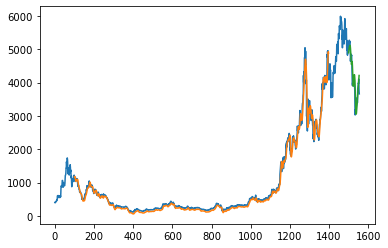

In [72]:
look_back=timestep
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [73]:
training_size = int(len(df_close)*0.9)
test_size = int(len(df_close)) - training_size
train_data, test_data = df_close[0:training_size:],df_close[training_size:len(df_close),:1]
print(len(test_data))

156


In [74]:
#len(test_data)-num_steps_back is the number to which you index here
x_input=test_data[(len(test_data))-timestep:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input


[0.9318471716684485,
 0.9393385138547602,
 0.9601094260332793,
 1.0,
 0.983201247853648,
 0.9662696776404666,
 0.994479236830959,
 0.9779063919818923,
 0.9745617518795223,
 0.9688075181983398,
 0.9516891880527406,
 0.8826853429794682,
 0.9012063257224312,
 0.839058988552451,
 0.9057405109876884,
 0.9297607300279161,
 0.9005351702371354,
 0.8647903008651806,
 0.9174369851439406,
 0.8945933454392955,
 0.9023063557641156,
 0.8583132140135397,
 0.8728075132170218,
 0.9110532367248295,
 0.9446352812970694,
 0.9879734752294755,
 0.9811159698370071,
 0.965146125918874,
 0.9038991760982142,
 0.8817836257013202,
 0.8968106105087461,
 0.9277710344540105,
 0.9096786768951421,
 0.9369076426062453,
 0.8718762069374335,
 0.8274295883940274,
 0.8655442392708429,
 0.8760479267648268,
 0.8058446457255876,
 0.8011593570211055,
 0.8588776495617712,
 0.8428253553331434,
 0.8323488465254586,
 0.8502104761567588,
 0.8420884557788466,
 0.8470412923577613,
 0.8651171099800719,
 0.851958555851281,
 0.877759851

In [75]:
lst_output=[]
n_steps=timestep
i=0
while(i<days_predict):
    
    if(len(temp_input)>timestep):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.67661357]
101
1 day input [0.93933851 0.96010943 1.         0.98320125 0.96626968 0.99447924
 0.97790639 0.97456175 0.96880752 0.95168919 0.88268534 0.90120633
 0.83905899 0.90574051 0.92976073 0.90053517 0.8647903  0.91743699
 0.89459335 0.90230636 0.85831321 0.87280751 0.91105324 0.94463528
 0.98797348 0.98111597 0.96514613 0.90389918 0.88178363 0.89681061
 0.92777103 0.90967868 0.93690764 0.87187621 0.82742959 0.86554424
 0.87604793 0.80584465 0.80115936 0.85887765 0.84282536 0.83234885
 0.85021048 0.84208846 0.84704129 0.86511711 0.85195856 0.87775985
 0.86326356 0.87313864 0.86811092 0.85969866 0.81000556 0.77035959
 0.78660837 0.77317296 0.79190622 0.80603681 0.79724604 0.80132999
 0.75197866 0.72157212 0.66794766 0.64620888 0.66063053 0.64552966
 0.67407085 0.69850988 0.67241739 0.68772144 0.69210594 0.69617692
 0.66518063 0.65390846 0.64008794 0.61943842 0.52854056 0.49583106
 0.52285394 0.50527665 0.50825238 0.51250951 0.506541   0.53436179
 0.54522686 0.54627395 0.56275707

In [76]:
print(len(df_close))

1555


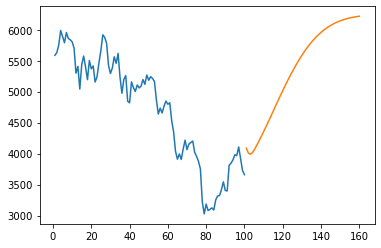

In [77]:
day_new=np.arange(1,timestep + 1)
day_pred=np.arange(timestep + 1,timestep + 1 + days_predict)
#this num is len(df_close)-30
plt.plot(day_new,scaler.inverse_transform(df_close[len(df_close)-timestep:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

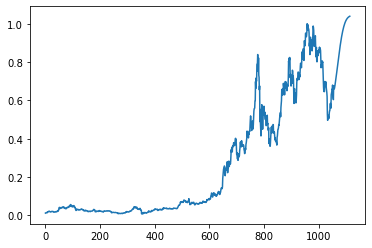

In [78]:
df_new=df_close.tolist()
df_new.extend(lst_output)
plt.plot(df_new[500:])

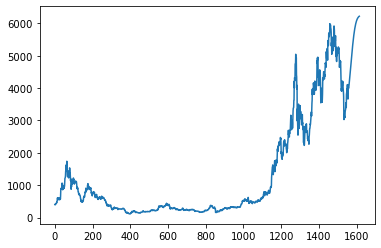

In [79]:
df_new=scaler.inverse_transform(df_new).tolist()
plt.plot(df_new)